Tensorflow practice from coursera imperial college london

In [5]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.4.1'

Week 1

In [2]:
mnist_data='/home/craig/Documents/coursera/imperial_1/1/tutorials/data/mnist.csv'
data=np.loadtxt(mnist_data,delimiter=',')

In [3]:
data.shape

(60000, 785)

In [4]:
x_train=data[:,1:]
y_train=data[:,0]
x_train=x_train/255.0

In [9]:
y_train[0:4,]

array([5., 0., 4., 1.])

Adam optimizer(https://arxiv.org/pdf/1412.6980.pdf):
Uses a momentum term $m_t$ at time step t, with weights at time t being $w_t$, along with a learning rate (step size) and two decay rates, respectively (with recommended defaults) $\alpha=.001, \beta_1=.9, \beta_2=.999,\epsilon=10*{-8}$.  The optimization function is $f$. \
$g \leftarrow \nabla_w f(w)$ get gradients \
$m \leftarrow \beta_1 m +(1-\beta_2)g$ update biased first moment \
$v \leftarrow \beta_2 v +(1-\beta_2)g^2$ update biased second moment \
$m \leftarrow m/(1-\beta_1)$ bias corrected first moment \
$v \leftarrow m/(1-\beta_2)$ bias corrected second moment \
$w \leftarrow w -\alpha m/(\sqrt{v} +\epsilon)$ update weights 

Use sparse categorical cross entropy when labels are integers, categorical when labels are one hot encoded.
Accuracy is what proportion of predictions are equal to labels.


In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
#alternatively
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16,activation='relu')) # can add input shape if desired, 
#Flattern layer unrolls a multi dim tensor into a vector
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train,epochs=3,batch_size=32)


Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7419 - accuracy: 0.7821
Epoch 2/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2656 - accuracy: 0.9241
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2182 - accuracy: 0.9384


Week 2:  Sequential models

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax,Conv2D,MaxPooling2D,Conv1D,MaxPooling1D

In [29]:
#feed forward  Weights are created when input layer provided (e.g via flatten or other)
model=Sequential([
    Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16,activation='relu',name='cool_layer'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
#model.weights
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
cool_layer (Dense)           (None, 16)                12560     
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [2]:
conv_model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)), #num filters then size conv, output shape (batch size, input-2,,input-2, filers)
    #input shape image size then channels
    MaxPooling2D((3,3)), #output maps 3x3 into 1 covering image without overlap, then num filters (None, 10,10,16)
    Flatten(),#(None, 1600)
    Dense(64,activation='relu'),#(None,64)
    Dense(10,activation='softmax') #n(none 10)
]) #with padding = same the image sizes will not change
#can use kernal size pool size if smae dimensions

NameError: name 'Sequential' is not defined

In [38]:
conv_model_1=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)), 
    MaxPooling2D((3,3)), 
    Flatten(),
    Dense(10,activation='softmax') #n(none 10)
]) #with padding = same the image sizes will not change
#can use kernal size pool size if smae dimensions
conv_model_1.compile(optimizer='sgd',#can modify parameters by going directly to tf.keras.optimizers.SGD(learning_rates___)
             loss='binary_crossentropy',
             metrics=['accuracy','mean_average_error','precision','recall'])

In [13]:
#initializing weights and biases
model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

#or
model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))
#https://keras.io/initializers/

optimizer SGD, activation elu, loss binary crossentropy
https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class computes cross entropy loss for 0,1 two class
SGD is gradient descent with momentum
$v=mv- \alpha g$ where alpha is learning rate \ 
$w=w+v$
ELU is like relu but allows negative values as low as negative 1 \
$e(z)=z, z>0$ \
$\alpha (e^z-1),z<0$\
mean absolute error is the average absolute value of error, 'mae'

In [32]:
model = Sequential([
     Dense(64,activation='relu',input_shape=(32,)),
    Dense(1,activation='sigmoid')])
model.compile(optimizer='sgd',#can modify parameters by going directly to tf.keras.optimizers.SGD(learning_rates___)
             loss='binary_crossentropy',
             metrics=['accuracy','mean_average_error','precision','recall','false_positives'])# can set threshold for binary accuracy etc.

In [17]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import tensorflow as tf

In [8]:
fashion_data=tf.keras.datasets.fashion_mnist

In [9]:
(train_im, train_label),(test_im, test_label )=fashion_data.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [11]:
#rescale
train_im=train_im/255.0
test_im=test_im/255.0


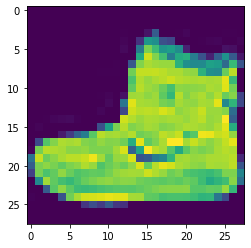

In [18]:
img=train_im[0,:,:]
plot.imshow(img)
plot.show()

In [63]:
conv_model_1=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)), 
    MaxPooling2D((3,3)), 
    Flatten(),
    Dense(10,activation='softmax') #n(none 10)
]) #with padding = same the image sizes will not change
#can use kernal size pool size if smae dimensions
conv_model_1.compile(optimizer='adam',#can modify parameters by going directly to tf.keras.optimizers.SGD(learning_rates___)
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy','mae'])

In [64]:
history=conv_model_1.fit(train_im[...,np.newaxis],train_label,epochs=2,batch_size=256)

Epoch 1/2
235/235 [==============================] - 18s 74ms/step - loss: 2.2771 - accuracy: 0.2279 - mae: 4.4122
Epoch 2/2
235/235 [==============================] - 18s 78ms/step - loss: 1.9058 - accuracy: 0.6253 - mae: 4.4270


In [71]:
type(history.history)
history.history.keys()

dict_keys(['loss', 'accuracy', 'mae'])

In [72]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,2.222315,0.37765,4.42
1,1.768426,0.63505,4.42


In [66]:
loss,accuracy,mae=conv_model_1.evaluate(test_im[...,np.newaxis],test_label)

313/313 [==============================] - 2s 5ms/step - loss: 1.5026 - accuracy: 0.6506 - mae: 4.4200


In [67]:
loss,accuracy,mae

(1.5025826692581177, 0.650600016117096, 4.419997215270996)

In [69]:
pred=conv_model_1.predict(test_im[...,np.newaxis])
#expects a batch, so may need to add another axis at the front if only one image

In [70]:
pred.shape

(10000, 10)

# Week 3

In [73]:
#you can add in validation at trining time
history=conv_model_1.fit(train_im[...,np.newaxis],train_label,epochs=1,batch_size=256,validation_split=0.2)
#alternatively, can provide selected test sets using the validation data command, validation_data=()

188/188 [==============================] - 16s 86ms/step - loss: 1.3399 - accuracy: 0.6649 - mae: 4.4294 - val_loss: 1.1953 - val_accuracy: 0.6794 - val_mae: 4.3824


In [74]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae,val_loss,val_accuracy,val_mae
0,1.339873,0.664896,4.429391,1.195262,0.679417,4.382433


# Loss
L2 loss:  $\hat L(w) =L(w) +\sum_{i,j}w_{i,j}^2$ 
so $W \leftarrow (1-\epsilon \alpha)W -\epsilon \nabla L(W)$, resulting in additional shrinking of W. \
In L1, the square is replaced by the absolute value

In [77]:
reg=tf.keras.regularizers.l2(.001)
#can also do l1 and l2
#can also add a biar regulirizer
#can also do dropout, including dropout as a layer, with drop out rate.
#at training time, you use dropout, but no dropoit when you do evaluate and predict.


In [81]:
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import regularizers


In [83]:
wd=.0001
rate=.3
reg_model=Sequential([
    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
    Dropout(rate),
    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
    Dropout(rate),
    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
    Dropout(rate),
    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
    Dropout(rate),
    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
    Dropout(rate),
    Dense(1),  
])


In [85]:
reg_model.compile(optimizer='adam',#can modify parameters by going directly to tf.keras.optimizers.SGD(learning_rates___)
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy','mae'])
#can also do batch normalizattion with tf.keras.layers.BatchNormalization().